# Fordgobike data exploration

#### by Anderson Macharia Kinyua

### Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco

Bay area. In the this part, we will go across several topics which affect bike sharing.

## Preliminary data wrangling


Load the dataset and explore possible issues found in the dataset.

In [57]:
## load necessary packages
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
## exploration
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [59]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [60]:
bike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [61]:
bike['start_station_id'].value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [62]:
bike['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

#### As noted above there are no duplicate station names

In [63]:
bike['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [64]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [65]:
bike['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [66]:
bike['bike_id'].value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
2297      1
2258      1
2415      1
1397      1
5067      1
Name: bike_id, Length: 4646, dtype: int64

In [67]:
bike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
136438,583,2019-02-08 09:48:54.1370,2019-02-08 09:58:38.0810,22.0,Howard St at Beale St,37.789756,-122.394643,64.0,5th St at Brannan St,37.776754,-122.399018,5224,Subscriber,1974.0,Male,No


In [68]:
bikes = bike.dropna()
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?

The following dataset contains 183412 rows and 16 columns. I have dropped several rows and formed a new dataset called bikes.

### Possible features of interest

I'll investigate the stations which had more visits and also how other factors correlated with the visits. 

Maybe, stations which were opened earlier had more visits. 

I expect that in the dataset, more males would be engaged in bike riding than any other gender.

One of the factors that would also be of interest is the user_type; Does a customer ride for longer? do they share the bike

during the given duration? 

It would also be worth visualizing different age groups. We expext the younger generation to be more engaged in bike 
riding compared to their older counterparts. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some of the features that would be of support include:duration_sec, start_time, start_station_id, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip.

## Univariate exploration

#### I'll first start with duration taken for each ride.

In [69]:
bike['duration_sec'].min()

61

In [70]:
bike['duration_sec'].max()

85444

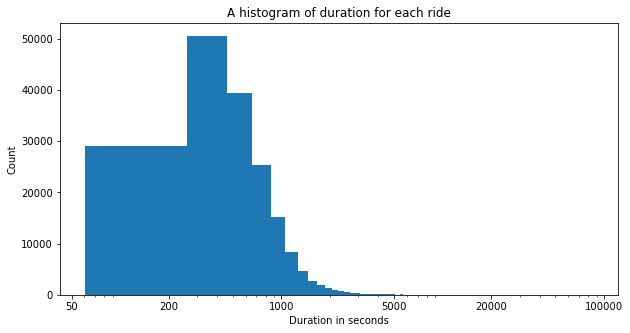

In [71]:
def histogram():
    plt.figure(figsize = [10,5])
    ticks = [50,200,1000,5000,20000,100000]
    labels = ["{}".format(x) for x in ticks]
    bins = np.arange(bike['duration_sec'].min(), bike['duration_sec'].max(),200)
    plt.hist(data = bike, x = 'duration_sec', bins = bins)
    plt.xscale('log')
    plt.title('A histogram of duration for each ride')
    plt.xticks(ticks, labels, size = 10)
    plt.yticks(size = 10)
    plt.xlabel('Duration in seconds')
    plt.ylabel('Count')
histogram()

The Distribution of duration taken for each ride seems to be enormous. It seems that longer rides of more than 1000 seconds are less preferred compared to shorter rides. However, very long rides are less prefferred.

#### Let's look into the distribution of gender in bike riding.

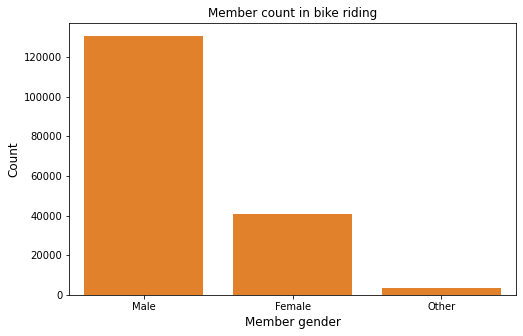

In [72]:
plt.figure(figsize = [8,5])
order = bike['member_gender'].value_counts(sort = True).index
sb.countplot(data = bike,x = 'member_gender', color = sb.color_palette()[1], order = order);
plt.title('Member count in bike riding')
plt.xlabel('Member gender', size = 12);
plt.ylabel('Count', size = 12);

From the plot, it seems like males ride more than females. The ratio seems like a 3:1. I would be curious to see how other factors such as duration affect each gender's ride. Pie charts seem to be the perfect plot for this graph. 

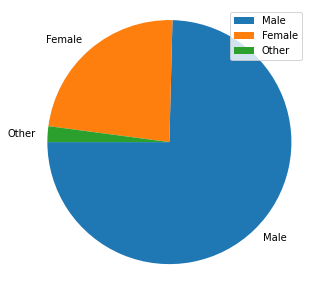

In [73]:
plt.figure(figsize = [20,5]);
label = bike['member_gender'].value_counts().index
plt.pie(bike['member_gender'].value_counts(), labels = label, startangle = 180);
plt.axis('square');
plt.legend(loc = 1);

From the plot, one can easily deduce that males are around 3/4 of the entire share of bike riders.

#### How does year of birth affect bike riding

In [74]:
bike['member_birth_year']

0         1984.0
1            NaN
2         1972.0
3         1989.0
4         1974.0
           ...  
183407    1996.0
183408    1984.0
183409    1990.0
183410    1988.0
183411    1989.0
Name: member_birth_year, Length: 183412, dtype: float64

In [75]:
bikes['member_birth_year'] = bikes['member_birth_year'].map(str)
bikes['member_birth_year'] = bikes['member_birth_year'].apply(lambda x:x.split('.')[0])
bikes['member_birth_year'] = bikes['member_birth_year'].astype(int)
bikes['member_birth_year']

C:\Users\USER\AppData\Local\Temp\ipykernel_6796\1197087687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['member_birth_year'] = bikes['member_birth_year'].map(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_6796\1197087687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['member_birth_year'] = bikes['member_birth_year'].apply(lambda x:x.split('.')[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_6796\1197087687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

0         1984
2         1972
3         1989
4         1974
5         1959
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 174952, dtype: int32

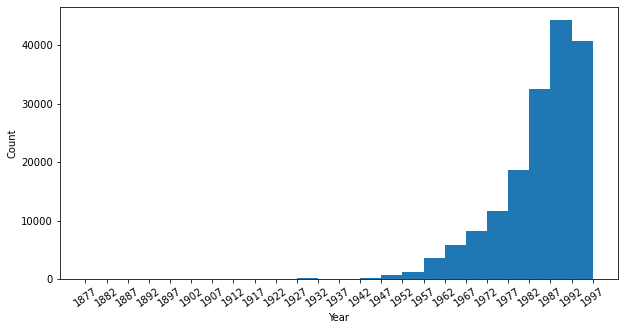

In [76]:
plt.figure(figsize = [10,5])
bins = np.arange(bikes['member_birth_year'].min() - 1, bikes['member_birth_year'].max()+ 1, 5)
plt.hist(data = bikes, x = 'member_birth_year', bins = bins);
plt.xlabel('Year');
plt.ylabel('Count');
plt.xticks(bins, rotation = 35);

It seems as if most people were born in between 1987 and 1992. Millenials just seem to love bike riding more than the other groups. However, the plot does not expose outliers in the data. We would probably need a scatter plot to find outliers in the dataset. This would need the dataset to be compared with another variables.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Distribution of duration taken for each ride seems to be enormous. It seems that longer rides of more than 1000 seconds are less preferred compared to shorter rides. However, very long rides are less prefferred.


It seems like males ride more than females. The ratio seems like a 3:1. I would be curious to see how other factors such as duration affect each gender's ride. Pie charts seem to be the perfect plot for this graph. Males are around 3/4 of the entire share of bike riders.


It seems as if most people were born in between 1987 and 1992. Millenials just seem to love bike riding more than the other groups. However, the plot does not expose outliers in the data. We would probably need a scatter plot to find outliers in the dataset. This would need the dataset to be compared with another variables.


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


I split the member birth year using the split function. I first converted the entire column into a string datatype, then split the year before converting it into integer for easy plotting. 

## Bivariate exploration

#### Lets continue with the investigation of member_birth_year against other variables

In [77]:
bike['start_station_id'].value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


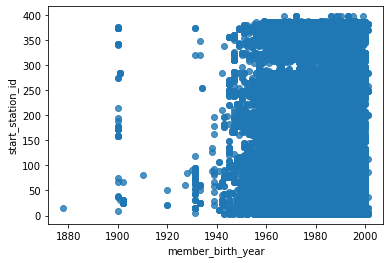

In [78]:
y = bikes['start_station_id'];
x = bikes['member_birth_year']
sb.regplot(x , y, fit_reg = False);

The plot seems to be too clustered in one side. We can use a random sample of the dataset to comeup with proper

visualisations that can be easily interpreted.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


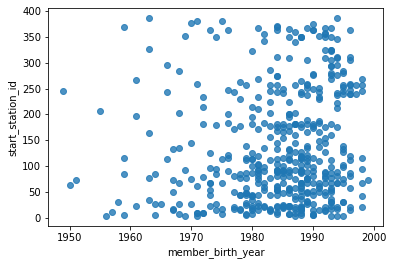

In [115]:
sample = np.random.choice(bike.shape[0], 500, replace = False);
bike_sample = bike.loc[sample]
y = bike_sample['start_station_id'];
x = bike_sample['member_birth_year']
sb.regplot(x , y, fit_reg = False);

Distribution of member_birth_year does not seem to affect the start station one probably decides to go to. Stations with 

older ids slightly just seems to have more bike rides taken.

#### Distribution of bike stations

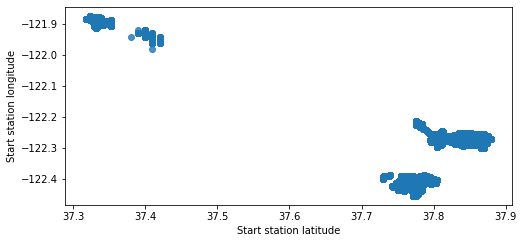

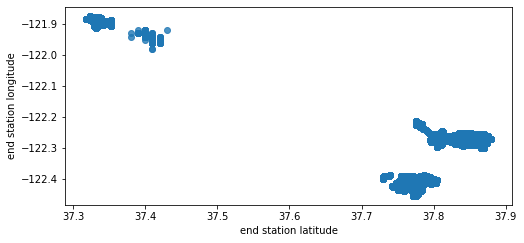

In [80]:
plt.figure(figsize = [8, 8])

plt.subplot(2,1,1)
sb.regplot(data =bike, x = 'start_station_latitude', y = 'start_station_longitude', fit_reg = False);
plt.xlabel('Start station latitude');
plt.ylabel('Start station longitude');
plt.show()

plt.figure(figsize = [8, 8])
plt.subplot(2,1,2)
sb.regplot(data = bike, x = 'end_station_latitude', y = 'end_station_longitude', fit_reg = False);
plt.xlabel('end station latitude');
plt.ylabel('end station longitude');
plt.show()

Given that the two plots are almost similar, we can come to the conclusion that the start and end stations are not evenly distributed. There are literally no stations in the north-east and south-west parts of the plot. Instead we have bike stations clustered in one part of the plot.

#### Does age matter when it comes to bike sharing?

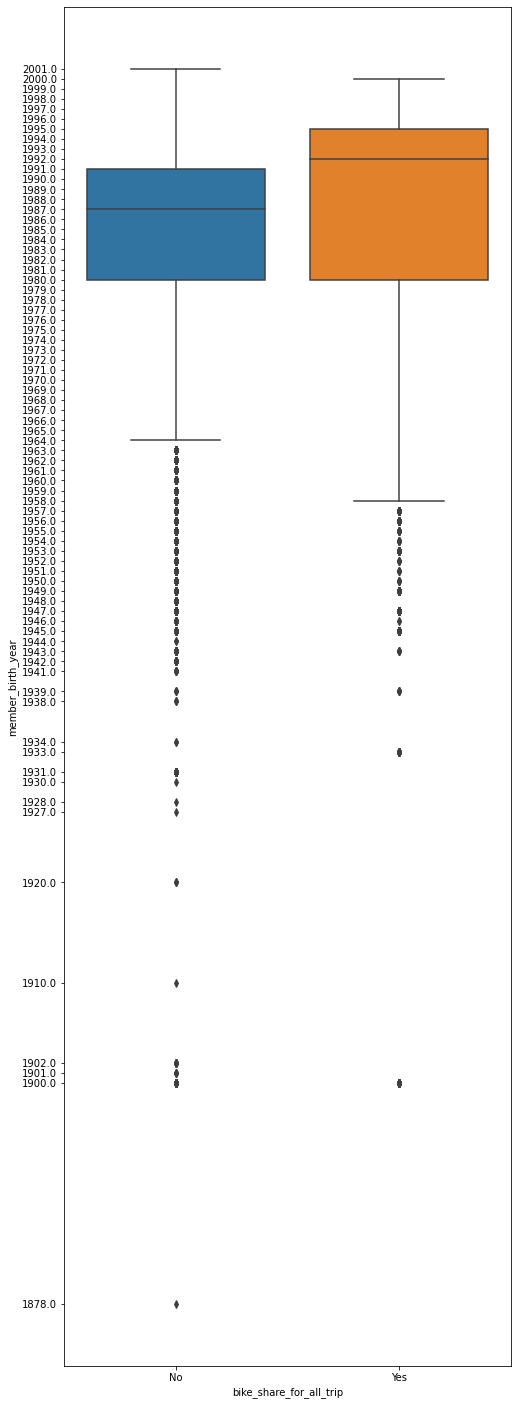

In [81]:
plt.figure(figsize = [8,25])
sb.boxplot(data = bikes, x = 'bike_share_for_all_trip', y = 'member_birth_year');
ticks = bike['member_birth_year'].value_counts().index
labels = []
for v in ticks: 
    v = "{}".format(v)
    labels.append(v)
plt.yticks(ticks,labels);

More younger individuals were more likely to share bikes than there older counterparts.

#### How are user types distributed among different ages?

In [82]:
# Note: Bikes is a similar dataset to the bike dataset but with dropped null values. 
# I did this because of errors gotten when converting string back to integer.
bikes['member_birth_year'] = bikes['member_birth_year'].apply(lambda x: str(x).split('.')[0])
bikes['member_birth_year'] = bikes['member_birth_year'].apply(lambda x: int(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_6796\4149004610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['member_birth_year'] = bikes['member_birth_year'].apply(lambda x: str(x).split('.')[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_6796\4149004610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['member_birth_year'] = bikes['member_birth_year'].apply(lambda x: int(x))


In [83]:
bikes['member_birth_year'].value_counts().index

Int64Index([1988, 1993, 1989, 1990, 1991, 1992, 1987, 1986, 1994, 1995, 1985,
            1984, 1983, 1980, 1982, 1996, 1981, 1979, 1997, 1998, 1978, 1977,
            1974, 1999, 1975, 1976, 1973, 1968, 1971, 1972, 2000, 1970, 1965,
            1969, 1967, 1964, 1963, 1966, 1962, 1961, 1957, 1960, 1959, 1958,
            1956, 1954, 1952, 1951, 1950, 1953, 1947, 1955, 1945, 1949, 1931,
            1900, 1948, 2001, 1943, 1942, 1933, 1946, 1939, 1902, 1941, 1901,
            1920, 1938, 1944, 1934, 1928, 1878, 1930, 1910, 1927],
           dtype='int64')

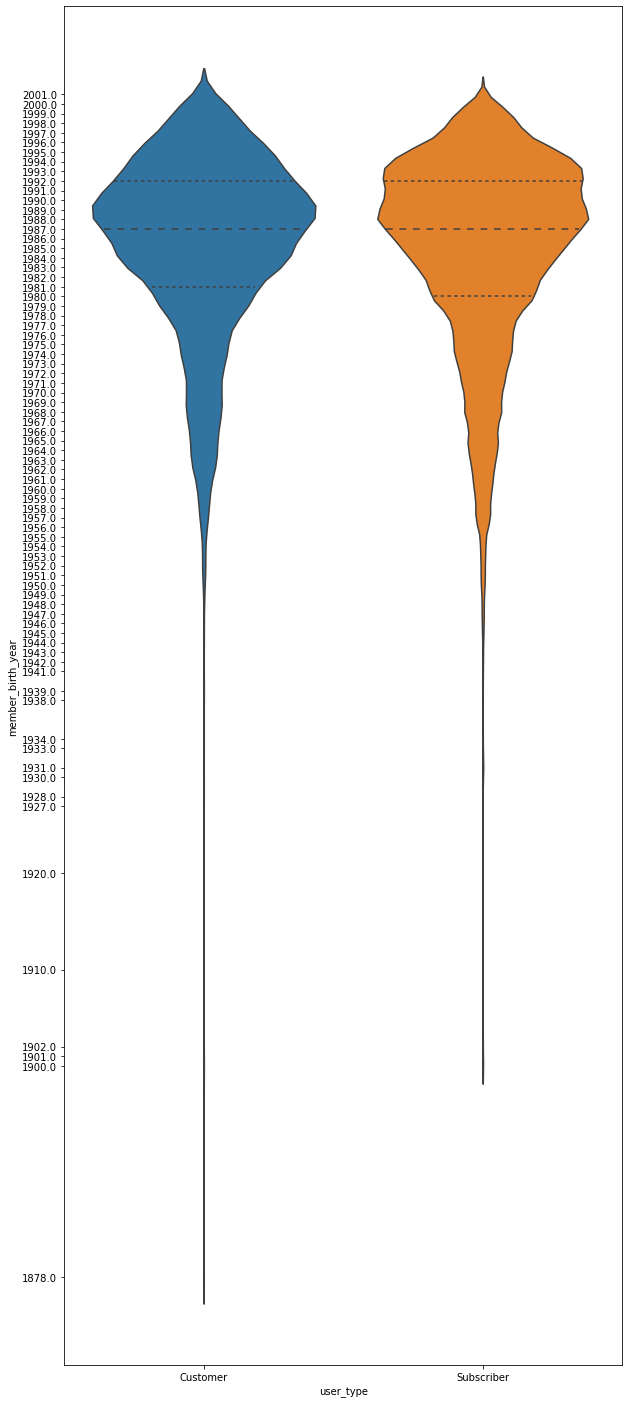

In [84]:
plt.figure(figsize = [10,25])
sb.violinplot(data = bikes, x = 'user_type', y = 'member_birth_year', inner = 'quartile');
ticks = bike['member_birth_year'].value_counts().index
labels = []
for v in ticks: 
    v = "{}".format(v)
    labels.append(v)
plt.yticks(ticks,labels);

There are more subscribers than customers in the second half compared to the other half. This is proven by the continues bulge 

after the median.

#### What time do most people ride bikes?

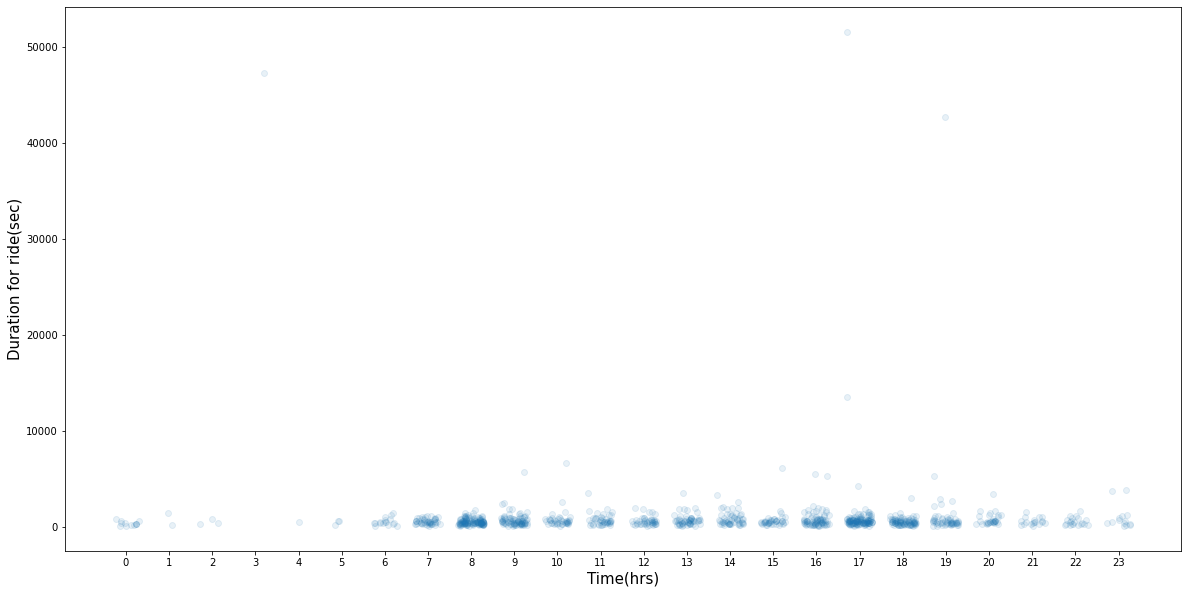

In [85]:
# For plotting, I'll just use hours to represent the x-axis
bike['time'] = bike['start_time'].apply(lambda x:x.split(' ')[1])
bike['time'] = bike['time'].apply(lambda x:x.split(':')[0])
bike['time'] = pd.to_numeric(bike['time'])

ticks = []
labels = []
for x in range(0,24):
    ticks.append(x)

for v in ticks:
    v = str(v)
    labels.append(v)
# label.append('{}'.format(v) for v in ticks)

sample = np.random.choice(bike.shape[0], 1000, replace = False);
bike_sample = bike.loc[sample]

plt.figure(figsize = [20,10]);
sb.regplot(data = bike_sample, x = 'time',y = 'duration_sec', x_jitter = .3,scatter_kws = {'alpha' : .1}, fit_reg = False);
plt.xticks(ticks, labels);
plt.xlabel('Time(hrs)', size = 15);
plt.ylabel('Duration for ride(sec)', size = 15);

From the plot we can conclude that bike riding is usually highest between  1600hrs - 1900hrs. At night is usually when 

there is the lowest number of bike rides.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


Distribution of member_birth_year does not seem to affect the start station one probably decides to go to. Stations with
older ids slightly just seems to have more bike rides taken.

From the plot we can conclude that bike riding is usually highest between 1600hrs - 1900hrs. At night is usually when
there is the lowest number of bike rides.

There are more subscribers than customers in the second half compared to the other half. This is proven by the continues bulge
after the median.

More younger individuals were more likely to share bikes than there older counterparts.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There are literally no stations in the north-east and south-west parts of the map. Instead we have bike stations clustered in one part of the map. This means bike sharing was limited to one part of the city.

## Multivariate Exploration

#### How does the type of user influence the start_id chosen and duration for each ride

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

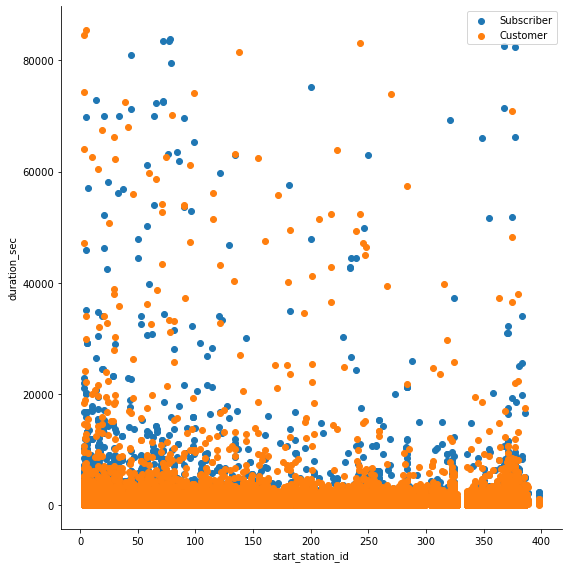

In [86]:
plt.figure(figsize = [15,10]);
g = sb.FacetGrid(data = bike, hue = 'user_type', size = 8);
g.map(plt.scatter,'start_station_id', 'duration_sec');
plt.legend(['Subscriber','Customer']);

From the plot, it seems that customers are more than subscribers. However, we may need to use a sample dataset since

the dots may be overlapping over each other especially at the bottom of the plot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

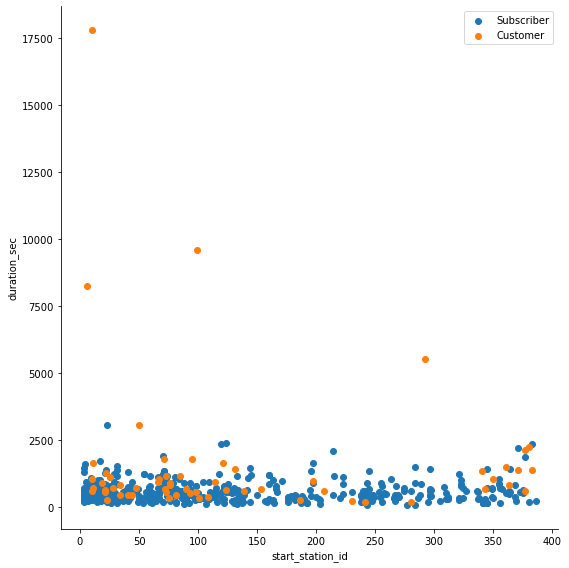

In [88]:
sample = np.random.choice(bike.shape[0], 500, replace = False);
bike_sample = bike.loc[sample]
plt.figure(figsize = [15,10]);
g = sb.FacetGrid(data = bike_sample, hue = 'user_type', size = 8);
g.map(plt.scatter,'start_station_id', 'duration_sec');
plt.legend(['Subscriber','Customer']);

From the plot, both customers and subscibers prefer short durations. However, we can see than most outliers in duration

were actually customers. This may be because it was a once in awhile activity.

We can also conclude that stations with lower id numbers have a higher number of customers. This may be caused by the fact that 

they may have been set up earlier and therefore are more known to customers than the newer stations. More marketing for the

newer stations can be done to increase users.

#### What time do most people share bikes?

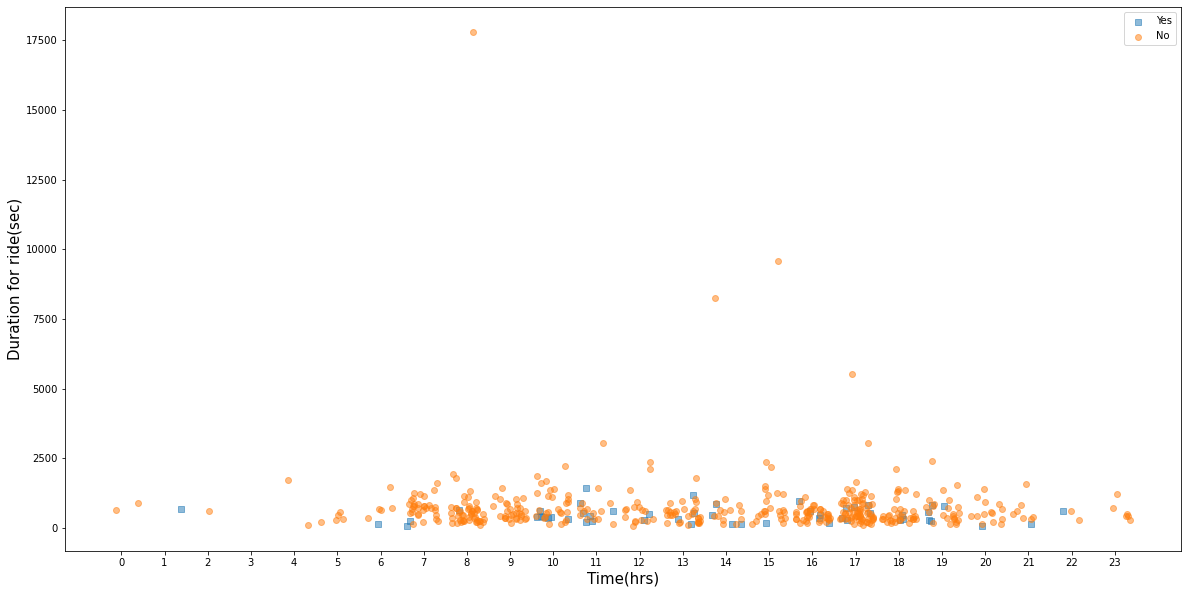

In [89]:
markers = [['Yes', 's', sb.color_palette()[0]],
          ['No', 'o', sb.color_palette()[1]]]
plt.figure(figsize = [20,10]);
for bike_share, mark, colour in markers:
    markings = bike_sample.loc[bike_sample['bike_share_for_all_trip'] == bike_share]
    sb.regplot(data = markings, x = 'time',y = 'duration_sec',x_jitter = .4, scatter_kws = {'alpha' : .5},
               marker = mark,color = colour, fit_reg = False);
plt.xticks(ticks, labels);
plt.xlabel('Time(hrs)', size = 15);
plt.ylabel('Duration for ride(sec)', size = 15);
plt.legend(['Yes','No']);

From the plot, bike sharing is just less common. That said, it is important to note that most of the bike sharing actually 

took place during shorter duration of riding and the time of the day when most people were actually riding. Could it be that it 

took place usually at that time of the day because of more traffic at stations? We could investigate the relationship between start

stations and bike share.

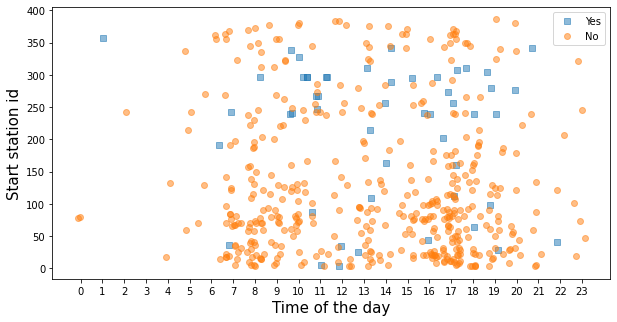

In [90]:
markers = [['Yes', 's', sb.color_palette()[0]],
          ['No', 'o', sb.color_palette()[1]]]
plt.figure(figsize = [10,5]);
for bike_share, mark, colour in markers:
    markings = bike_sample.loc[bike_sample['bike_share_for_all_trip'] == bike_share]
    sb.regplot(data = markings, x = 'time',y = 'start_station_id',x_jitter = .4, scatter_kws = {'alpha' : .5},
               marker = mark,color = colour, fit_reg = False);
plt.xticks(ticks, labels);
plt.ylabel('Start station id', size = 15);
plt.xlabel('Time of the day', size = 15);
plt.legend(['Yes','No']);

From the plots, start stations of ids 250 - 350 just seem to have more bike sharing than other stations. This was not expected 

since stations with lower ids whose traffic was more were expected to be leading. This clearly shows that there had to be

something different with the stated stations.

#### Does age have an impact on duration of a ride?

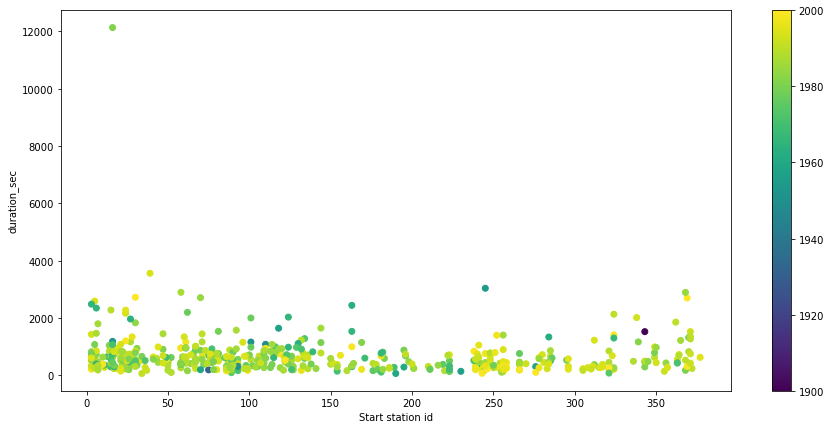

In [91]:
sample = np.random.choice(bike.shape[0], 500, replace = False);
bike_sample = bike.loc[sample]

plt.figure(figsize = [15,7]);
plt.scatter(data = bike_sample, x = 'start_station_id',y = 'duration_sec',c = 'member_birth_year');
plt.colorbar();
plt.xlabel('Start station id');
plt.ylabel('duration_sec');

The lower the age bracket, the higher the chances of a longer bike ride.

#### Are certain bikes preffered over others?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


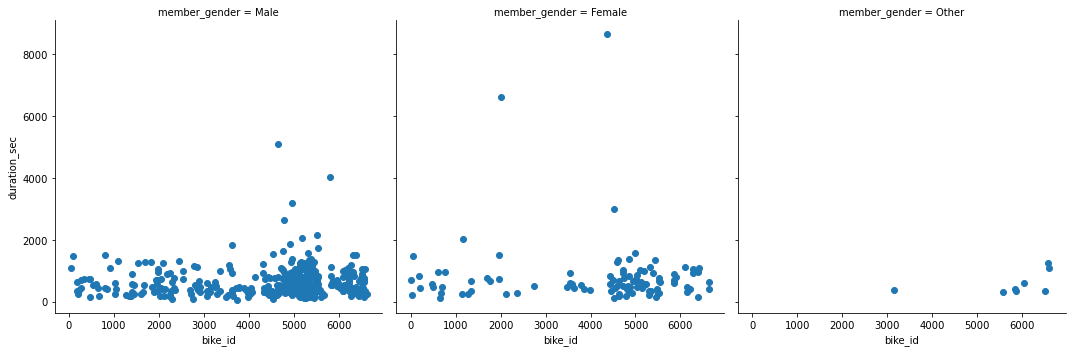

In [92]:
sample = np.random.choice(bike.shape[0], 500, replace = False);
bike_sample = bike.loc[sample]

g  = sb.FacetGrid(data = bike_sample,col = 'member_gender', margin_titles = True, size = 5);
g.map(plt.scatter, 'bike_id', 'duration_sec');

Bikes with higher ids were preffered than those with lower ids. This may be because the bikes were newer.

For longer durations, bikers tended to prefer the newer bikes.

Repairs and maintenance can be done on older bikes to reduce the difference.

In [93]:
bike.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time
44364,207,2019-02-22 14:58:50.0830,2019-02-22 15:02:17.6850,242.0,Milvia St at Derby St,37.860125,-122.269384,274.0,Oregon St at Adeline St,37.857567,-122.267558,3475,Subscriber,1947.0,Male,Yes,14


#### What are the differences among user_types?

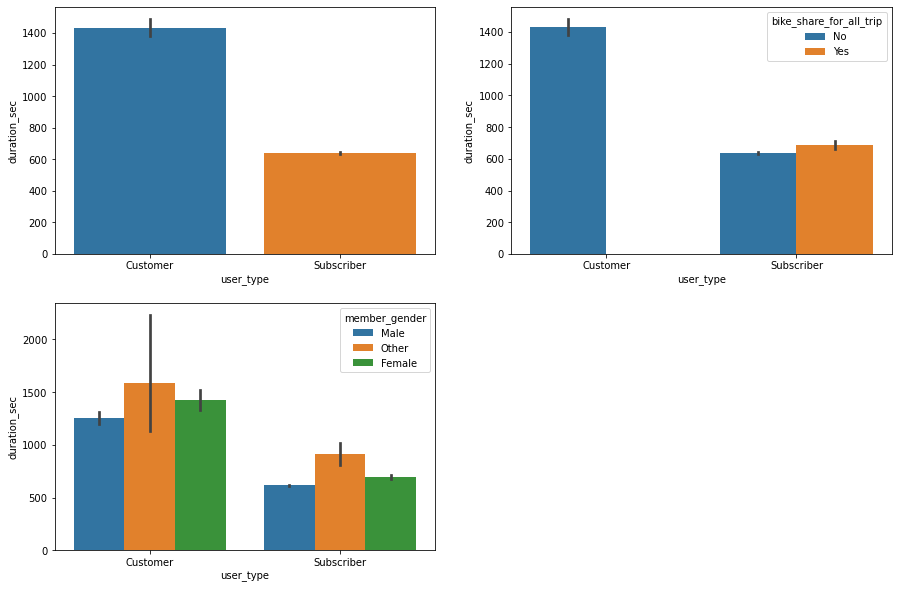

In [94]:
plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
sb.barplot(data = bike, x = 'user_type', y = 'duration_sec');

plt.subplot(2,2,2)
sb.barplot(data = bike, x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip');

plt.subplot(2,2,3)
sb.barplot(data = bike, x = 'user_type', y = 'duration_sec', hue = 'member_gender');


A common trait that had been noted earlier is that customers tended to ride for longer durations compared to subscribers.

This may be due to the factor that riding is a once in a while event or also may be to cover the higher charges(assuming that

customers pay more subscribers as this is the case in most businesses).

Subscribers were also more likely to share the bike than customers. There was literally no bike sharing among customers. This

may be due to a policy on bike_sharing.

The deviation among genders on average time for a bike ride is quite low.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the plot, both customers and subscibers prefer short durations. However, we can see than most outliers in duration
were actually customers. This may be because it was a once in awhile activity. 


We can also conclude that stations with lower id numbers have a higher number of customers. This may be caused by the fact that
they may have been set up earlier and therefore are more known to customers than the newer stations. More marketing for the
newer stations can be done to increase users.

From the plot, bike sharing is just less common. That said, it is important to note that most of the bike sharing actually
took place during shorter duration of riding and the time of the day when most people were actually riding. Could it be that it
took place usually at that time of the day because of more traffic at stations?

The lower the age bracket, the higher the chances of a longer bike ride.

Customers tended to ride for longer durations compared to subscribers. This may be due to the factor that riding is a once in a while event or also may be to cover the higher charges(assuming that customers pay more subscribers as this is the case in most businesses).

Subscribers were also more likely to share the bike than customers. There was literally no bike sharing among customers. This
may be due to a policy on bike_sharing.

#### Were there any interesting or surprising interactions between features?

Start stations of ids 250 - 350 just seem to have more bike sharing than other stations. This was not expected since stations with lower ids whose traffic was more were expected to be leading. This clearly shows that there had to be somethong different  with the stated stations.

Bikes with higher ids were preffered than those with lower ids. This may be because the bikes were newer. For longer durations, bikers tended to prefer the newer bikes. Repairs and maintenance can be done on older bikes to reduce the difference.

## Conclusions

In the above, 3 steps were taken during the exploratory process. I first began with univariate exploration, then bivariate exploration then finally completing it with a multivariate exploration. In the quest to answer the questions stated at introduction stage of the exploration, I came up with more findings that have clearly been explained at the end of each exploration. 